# Midterm 1
## READ ME
1 - Some cells maybe have entirely been commented out. They were used for testing various methods. These cells should all still run. However, were not used when producing graphs for the report. 

2 - Some methods require the variables mass, time, and dt have been declared prior to method call. 

3a - Methods have been created to solve for general cases.

3b - While most methods were defined early in a single cell, not all methods were done this way. Some exist directly before their call.

3c - I do not consider a cell to be a method. Therefore, only changing conditions at the start of the cell DOES NOT mean it has been entirely changed. Multiple lines may need to be updated. The cells were used a means to an end. 

4 - Plots are not considered to be a part of methods used and therefore have not been generalized. While MOST graphs have been generalized to label correctly, NOT ALL LABELS/TITLES WILL UPDATE. 

5 - All data and calculations were performed in a single notebook. This was done to allow for the generalization/ re-use of methods. As the required submission type of Jupiter notebooks, and I was unsure/could not find a way, to have multiple notebooks able to access methods in a different one.

6 - Total run time: 62s for all cells. For slower processors speeds the dt may need to be increased for time() methods. However, with current run time I found this time as appropriate.


### By: Mitchell humphries

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as m
from scipy.optimize import curve_fit

In [2]:
#Define 3 functions for plotting U(x). 

def U1(x):
    # Equation before
    #          2pi^2    *    x^4 / 4  - x^2 /2   +  1/4
    return (2*m.pi**2) * ( ((x**4)/4) - ((x**2)/2) + (1/4) )

def U2(x):
    # Equation before
    #          pi^2    *    1/2x^2   +    x^2 /2   -  1
    return (m.pi**2) * ( 1/(2*x**2) + ((x**2)/2) - 1 )

def U3(x):
    # Equation before
    #          2pi^2 / 3     *    1/2x^2     +   x^4 /4   -   3/4
    return ((2*m.pi**2) / 3) * ( 1/(2*x**2) + ((x**4)/4) - (3/4) )

In [3]:
# #Plots the three potentials on their own graph
# #Define Time array
# xValues1 = np.linspace(-2,2,500)
# xValues2 = np.linspace(0.2,5,500)
# xValues3 = np.linspace(0.05,5,500)

# UValues1 = U1(xValues1)
# UValues2 = U2(xValues2)
# UValues3 = U3(xValues3)

# #Make plot 1:
# plt.figure(figsize=(18,6))
# plt.plot(xValues1,UValues1)
# plt.title('Potential U1')
# plt.xlabel('x')
# plt.ylabel('U1(x)')
# plt.show()

# #Make plot 2:
# plt.figure(figsize=(18,6))
# plt.plot(xValues2,UValues2)
# plt.title('Potential U2')
# plt.xlabel('x')
# plt.ylabel('U2(x)')
# plt.show()

# #Make plot 3:
# plt.figure(figsize=(18,6))
# plt.plot(xValues3,UValues3)
# plt.title('Potential U3')
# plt.xlabel('x')
# plt.ylabel('U3(x)')
# plt.show()


## Figure 1

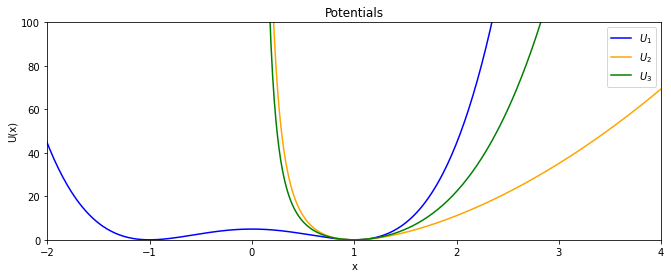

In [4]:
#### Make plot with all three potentials included.
#Define Time array

xValuesfull = np.linspace(-3,4,500)
xValuespos = np.linspace(0.01,4,250)

UValues1 = U1(xValuesfull)
UValues2 = U2(xValuespos)
UValues3 = U3(xValuespos)


plt.figure(figsize=(11,4))
plt.plot(xValuesfull,UValues1, color = 'blue', label = r'$U_1$')
plt.plot(xValuespos,UValues2, color = 'orange', label = r'$U_2$')
plt.plot(xValuespos,UValues3, color = 'green', label = r'$U_3$')
plt.title('Potentials')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.xlim(-2,4)
plt.ylim(0,100)
plt.legend(loc = 'upper right')
plt.show()


# Declare methods

In [5]:
#Define constants
mass = 1

#################################################################################################

#Mutliple defintionas for time. These are used to allow quick adjustment of the time arrays

def timeShort(): #Used to plot just a few occilations
    tmin1 = 0
    tmax1 = 7.0
    dt1 = 0.001
    time1 = np.arange(tmin1,tmax1+dt1,dt1)
    return time1, dt1

def timeNorm(): 
    tmin1 = 0
    tmax1 = 15
    dt1 = 0.001
    time1 = np.arange(tmin1,tmax1+dt1,dt1)
    return time1, dt1

def timeMed(): #This is used to see when forces are applied to the particle from outside the system
    tmin1 = 0
    tmax1 = 25
    dt1 = 0.001
    time1 = np.arange(tmin1,tmax1+dt1,dt1)
    return time1, dt1    
    

def timeKindOfLong():#NOTE: THIS IS USED WHEN IT IS NEEDED To have longer times. 
    tmin2 = 0
    tmax2 = 100
    dt2 = 0.005
    time2 = np.arange(tmin2,tmax2+dt2,dt2)  
    return time2, dt2
    
def timeLong():
    tmin2 = 0
    tmax2 = 300
    dt2 = 0.005
    time2 = np.arange(tmin2,tmax2+dt2,dt2)  
    return time2, dt2
    
#####################################################################################################
#Make def for filling Default Arrays
def MDA(xo,vo): # Intital X location, innitial velocity
    xArray = np.zeros(len(time))
    vArray = np.zeros(len(time))
    eArray = np.zeros(len(time))
    xArray[0] = xo
    vArray[0] = vo
    return xArray, vArray, eArray

#Find and sum the energy at every position
def SumEnergy(Un,pos,vel): #Potential well, position array, velocity array
    energy = np.zeros(len(pos))
    for i in range(0,len(time)):
        #Get Potential Energy
        pe = Un(pos[i])
        
        #Get Kinetic Energy
        ke = 1/2 * mass * vel[i]**2
        
        #Get total energy 
        energy[i] = abs(pe) + abs(ke)    
        
    return energy

#Find the expecatation value
def getExp(vArray): #Value array to get expectation value of
    return np.sum(vArray)/len(vArray)

#Method to get local Max within X values. Used for period determination. 
def localMax(xArray,yArray,xMin,xMax): # xArray, yArrau, value of. Minimum X value, Maximuum X value
    #Determin index of X locations
    indexMin = 0
    indexMax = 0
    #Get Min location
    while xArray[indexMin] < xMin:
        indexMin = indexMin + 1
    
    #Get max location
    indexMax = indexMin
    while xArray[indexMax] < xMax:
        indexMax = indexMax + 1
        
    #Make SubArray
    numOfXIndex = indexMax - indexMin
    ytemp = np.zeros(numOfXIndex)
    
    #Fill Subarray
    for i in range(0,len(ytemp)):
        ytemp[i] = yArray[indexMin + i]
        
    #Get max Y value
    yvaluemax = np.amax(ytemp)
    ymaxloc = np.where(ytemp == yvaluemax)
    
    #Get max X value
    xvaluemax = xArray[int(ymaxloc[0]) + indexMin]
    
    #Return All values
    return xvaluemax, yvaluemax, int(ymaxloc[0] +indexMin) #Xvalye of maximum in Y array, Y value of maximum, index of maximum


#Get FT transforme (NOTE: THIS IS NOT NORMILIZED)
def FTmethod(xArray): #Xarray
    FT = np.fft.rfft(xArray)
    freq = np.fft.rfftfreq(len(xArray),time[1]-time[0])
    mags = abs(FT)
    return freq, mags #Return frequency and magnitude
####################################################################################################

#Define functions for RK2, NO DRAG values
#Takes: intital pos, intital velocity
#Returns: Position arrays, velocity array, Energy array

#Implement RK for U1
def RK1(xo,vo):
    #Get intital Arays
    xArray, vArray, eArray = MDA(xo,vo)
    
    #DO RK method
    for i in range(1,len(time)):
        #Get Prime values
        xp = xArray[i-1] + 0.5 * dt * vArray[i-1]
        #                                 #Negative Partial detivative of U(x)
        vp = vArray[i-1] + 0.5 * dt * (-2*m.pi**2)*xArray[i-1]*( (xArray[i-1]**2) - 1)
        
        #Get step (i) values
        xArray[i] = xArray[i-1] + vp * dt
        vArray[i] = vArray[i-1] + dt * (-2*m.pi**2)*xp*((xp**2) - 1)
    
    #Get Energy Array
    eArray = SumEnergy(U1,xArray,vArray)
    
    return xArray, vArray, eArray

##########################################################################################################
#Implement RK for U2
def RK2(xo, vo): ####CONFUSED HERE
    #Get intital Arays
    xArray, vArray, eArray = MDA(xo,vo)
    
    #DO RK method
    for i in range(1,len(time)):
        #Get Prime values
        xp = xArray[i-1] + 0.5 * dt * vArray[i-1]
        #                                 #Negative Partial detivative of U(x)
        vp = vArray[i-1] + 0.5 * dt * (-1*m.pi**2) * ((xArray[i-1]**4) -1)/(xArray[i-1]**3)
        #Get step (i) values
        xArray[i] = xArray[i-1] + vp * dt
        vArray[i] = vArray[i-1] + dt * (-1*m.pi**2) * ((xp**4 -1)/(xp**3))
        
    #Get Energy Array
    eArray = SumEnergy(U2,xArray,vArray)
    
    return xArray, vArray, eArray

##########################################################################################################
#IMplement RK for U3
def RK3(xo, vo):
    #Get intital Arays
    xArray, vArray, eArray = MDA(xo,vo)
    
    #DO RK method
    for i in range(1,len(time)):
        #Get Prime values
        xp = xArray[i-1] + 0.5 * dt * vArray[i-1]
        #                                 #Negative Partial detivative of U(x)
        vp = vArray[i-1] + 0.5 * dt * (-2*m.pi**2) * (xArray[i-1]**6 -1) / (3*xArray[i-1]**3)
        
        #Get step (i) values
        xArray[i] = xArray[i-1] + vp * dt
        vArray[i] = vArray[i-1] + dt * (-2*m.pi**2) * (xp**6 -1) / (3*xp**3)
        
    #Get Energy Array
    eArray = SumEnergy(U3,xArray,vArray)
    
    return xArray, vArray, eArray

# Declare line fiting methods

In [6]:
#########################################################################################################
#Here are methods used to determin the linear and exponeital lines

#Define fit equations
def linFit(x, m, b):
    return x*m + b

def invFit(x, M, b):
    return (M / x) + b

def expFit(x,p,b):
    return ((x**p) + b)

def epFit(x,m,b):
    return ( (m**x) + b)

#Define method to use fit equations.
#Takes: xArray, and yArray
#Returns: yArray of fit with corisepodning values to xArray, constant 1, constant 2

def myLinFit(xArray,yArray):
    param, paramCov = curve_fit(linFit, xArray, yArray)
    yFit = []
    for i in xArray:
        yFit.append(linFit(i,param[0],param[1]))
    slope = param[0]
    B = param[1]
    
    return yFit,slope,B

def myInvFit(xArray,yArray):
    param, paramCov = curve_fit(invFit, xArray, yArray)
    yFit = []
    for i in xArray:
        yFit.append(invFit(i,param[0],param[1]))
    Mconst = param[0]
    B = param[1]
    
    return yFit,Mconst,B

def myExpFit(xArray,yArray):
    param, paramCov = curve_fit(expFit, xArray, yArray)
    yFit = []
    for i in xArray:
        yFit.append(expFit(i,param[0],param[1]))
    power = param[0]
    B = param[1]
    
    return yFit,power,B

def myEpFit(xArray,yArray):
    param, paramCov = curve_fit(epFit, xArray, yArray)
    yFit = []
    for i in xArray:
        yFit.append(epFit(i,param[0],param[1]))
    base = param[0]
    B = param[1]
    
    return yFit,base,B

# Test 1st RK1

In [7]:
# #SET TIME ARRAYS
# time, dt = timeNorm()

# #Test 1st set
# x1,v1,e1 = RK1(1.42,0)

# plt.figure(figsize=(18,6))
# plt.plot(time,x1)
# plt.title('U1 position')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,v1)
# plt.title('U1 velocity')
# plt.xlabel('time')
# plt.ylabel('velocity')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,e1)
# plt.title('U1 energy')
# plt.xlabel('time')
# plt.ylabel('Total energy')
# plt.show()


# Test Rk2

In [8]:
# #SET TIME ARRAYS
# time, dt = timeNorm()

# #Test 2nd set
# x2,v2,e2 = RK2(1.42,0)

# plt.figure(figsize=(18,6))
# plt.plot(time,x2)
# plt.title('U2 position')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,v2,)
# plt.title('U2 velocity')
# plt.xlabel('time')
# plt.ylabel('velocity')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,e2)
# plt.title('U2 energy')
# plt.xlabel('time')
# plt.ylabel('Total energy')
# plt.show()


# Test RK3

In [9]:

# #SET TIME ARRAYS
# time, dt = timeNorm()

# #Test 3rd set
# x3,v3,e3 = RK3(1.42,0)

# plt.figure(figsize=(18,6))
# plt.plot(time,x3)
# plt.title('U3 position')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,v3,)
# plt.title('U3 velocity')
# plt.xlabel('time')
# plt.ylabel('velocity')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,e3)
# plt.title('U3 energy')
# plt.xlabel('time')
# plt.ylabel('Total energy')
# plt.show()


# Gather data for Demo of working RK methods
# Figure 2,3,4

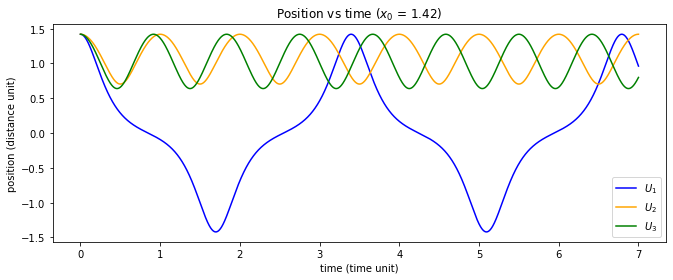

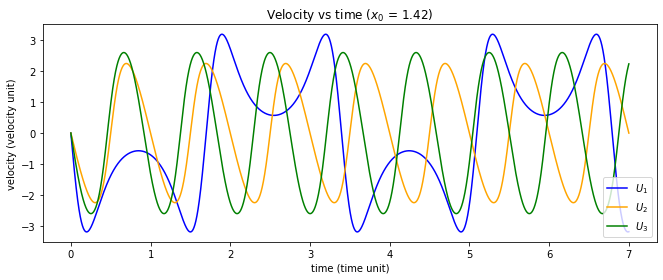

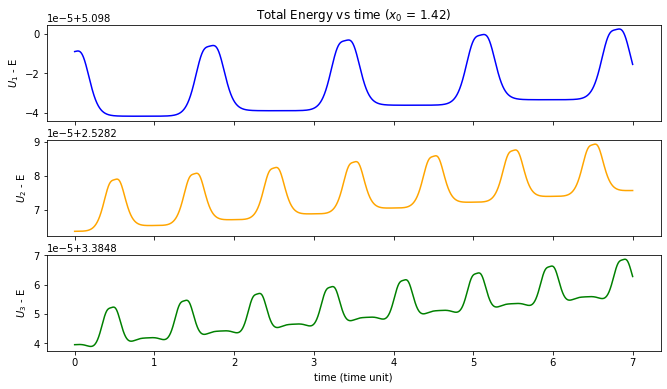

In [10]:
###################################################################################
#Gather data
time, dt = timeShort()
x1,v1,e1 = RK1(1.42,0)
x2,v2,e2 = RK2(1.42,0)
x3,v3,e3 = RK3(1.42,0)

##################################################################################
#Make position plot
plt.figure(figsize=(11,4))
plt.plot(time,x1, label = r'$U_1$', color = 'blue')
plt.plot(time,x2, label = r'$U_2$', color = 'orange')
plt.plot(time,x3, label = r'$U_3$', color = 'green')
plt.title('Position vs time ($x_0$ = {})'.format(1.42))
plt.xlabel('time (time unit)')
plt.ylabel('position (distance unit)')
plt.legend(loc = 'lower right')
plt.show()

###################################################################################
#Make velocity graph
plt.figure(figsize=(11,4))
plt.plot(time,v1, label = r'$U_1$', color = 'blue')
plt.plot(time,v2, label = r'$U_2$', color = 'orange')
plt.plot(time,v3, label = r'$U_3$', color = 'green')
plt.title('Velocity vs time ($x_0$ = {})'.format(1.42))
plt.ylabel('velocity (velocity unit)')
plt.xlabel('time (time unit)')
plt.legend(loc = 'lower right')
plt.show()

##################################################################################
#Make plots that will be used to show Energy


#Make another plot with each line on its own graph
plt.figure(figsize=(11,6))
plt.ylabel("Total Energy (energy unit)")

#Plot U3
p3 = plt.subplot(3,1,3) #On bottom
plt.plot(time,e3, color = 'green')
plt.xlabel("time (time unit)")
plt.ylabel(r'$U_3$ - E')

#Plot U2
p2 = plt.subplot(3,1,2) #In middle
plt.plot(time,e2, color = 'orange')
plt.ylabel(r'$U_2$ - E')
plt.setp(p2.get_xticklabels(), visible=False)

#Plot U1
p1 = plt.subplot(3,1,1, sharex = p3) #On top
plt.plot(time,e1, color = 'blue')
plt.title('Total Energy vs time ($x_0$ = {})'.format(1.42))
plt.ylabel(r'$U_1$ - E')
plt.setp(p1.get_xticklabels(), visible=False)


#Show figure
plt.subplots_adjust(hspace=0.20)
plt.show()

# Test Periods for gathering periods
For values close to equallibrium the period is 1

In [11]:

# #SET TIME ARRAYS
# time, dt = timeNorm()

# #Gather data
# x1,v1,e1 = RK1(1.1,0) 
# x2,v2,e2 = RK2(1.1,0)
# x3,v3,e3 = RK3(1.1,0)

# #Plot all three periods on one graph.
# plt.figure(figsize=(18,6))
# plt.plot(time,x1,label = r'$U_1$')
# plt.plot(time,x2,label = r'$U_2$')
# plt.plot(time,x3,label = r'$U_3$')
# plt.title('Position')
# plt.xlabel('time')
# plt.ylabel('Position (distance unit)')
# plt.legend(loc = 'upper right')
# plt.show()

# #Get FT transform
# freq1, mags1 = FTmethod(x1)
# freq2, mags2 = FTmethod(x2)
# freq3, mags3 = FTmethod(x3)

# plt.figure(figsize=(18,6))
# plt.xlim(0.5,2.25)
# plt.ylim(0,1000)
# plt.plot(freq1,mags1,label = r'$U_1$')
# plt.plot(freq2,mags2,label = r'$U_2$')
# plt.plot(freq3,mags3,label = r'$U_3$')
# plt.title('Fourier Transforms')
# plt.xlabel('frequnecy')
# plt.ylabel('magnitude')
# plt.legend(loc = 'upper right')
# plt.show()


# fmax1,magmax1,indmax1 = localMax(freq1,mags1,0.8,1.2)
# fmax2,magmax2,indmax2 = localMax(freq2,mags2,0.8,1.2)
# fmax3,magmax3,indmax3 = localMax(freq3,mags3,0.8,1.2)

# #Print the max frequency values
# print('Un:  Period   Max Freq.    Mag. Value')
# print('U1:  {:3.4}       {:3.4f}       {:3.4f}'.format(1/fmax1,fmax1,magmax1))
# print('U2:  {:3.4}       {:3.4f}       {:3.4f}'.format(1/fmax2,fmax2,magmax2))
# print('U3:  {:3.4}       {:3.4f}       {:3.4f}'.format(1/fmax3,fmax3,magmax3))


# Test for gathering period far from eqilibrium
For one of them the freuencey will not change

For one of them the frequency will change

In [12]:

# #SET TIME ARRAYS
# time, dt = timeNorm()

# #Gather data
# x1,v1,e1 = RK1(1.5,0) 
# x2,v2,e2 = RK2(1.5,0)
# x3,v3,e3 = RK3(1.5,0)

# #Plot all three periods on one graph.
# plt.figure(figsize=(18,6))
# plt.plot(time,x1,label = r'$U_1$')
# plt.plot(time,x2,label = r'$U_2$')
# plt.plot(time,x3,label = r'$U_3$')
# plt.title('Position')
# plt.xlabel('time (time unit)')
# plt.ylabel('Position (distance unit)')
# plt.legend(loc = 'upper right')
# plt.show()

# #Get FT transform
# freq1, mags1 = FTmethod(x1)
# freq2, mags2 = FTmethod(x2)
# freq3, mags3 = FTmethod(x3)

# #Make plots of Fourier tranfrom
# plt.figure(figsize=(18,6))
# plt.xlim(0.25,2.25)
# plt.ylim(0,9000)
# plt.plot(freq1,mags1,label = r'$U_1$')
# plt.plot(freq2,mags2,label = r'$U_2$')
# plt.plot(freq3,mags3,label = r'$U_3$')
# plt.title('Fourier Transforms')
# plt.xlabel('frequnecy')
# plt.ylabel('magnitude')
# plt.legend(loc = 'upper right')
# plt.show()


# fmax1,magmax1,indmax1 = localMax(freq1,mags1,0.25,0.75)
# fmax2,magmax2,indmax2 = localMax(freq2,mags2,0.8,1.25)
# fmax3,magmax3,indmax3 = localMax(freq3,mags3,0.8,1.25)

# #Print the max frequency values
# print('Un:  Period       Fund Freq.    Mag. Value')
# print('U1:  {:3.4f}       {:3.4f}       {:3.4f}'.format(1/fmax1,fmax1,magmax1))
# print('U2:  {:3.4f}       {:3.4f}       {:3.4f}'.format(1/fmax2,fmax2,magmax2))
# print('U3:  {:3.4f}       {:3.4f}       {:3.4f}'.format(1/fmax3,fmax3,magmax3))


# Proven 1,2,3
# Figure 5,6

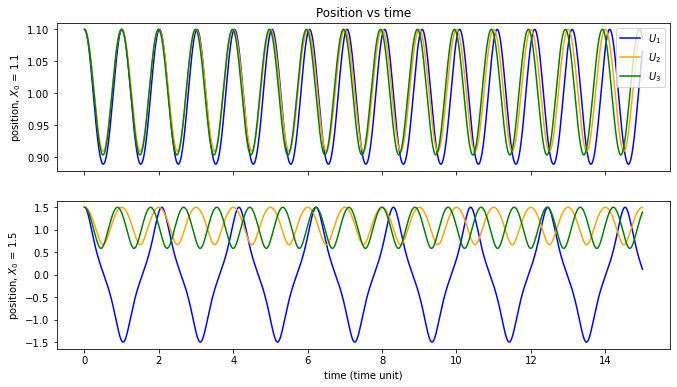

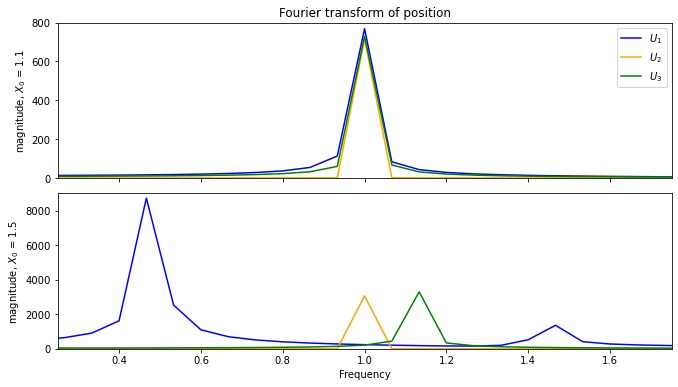

In [13]:
### Gather Data
time, dt = timeNorm()

XoClose = 1.1
XoFar = 1.5

xc1,vc1,ec1 = RK1(XoClose,0) #NOTE: c for close.
xc2,vc2,ec2 = RK2(XoClose,0)
xc3,vc3,ec3 = RK3(XoClose,0)

freqc1, magsc1 = FTmethod(xc1)
freqc2, magsc2 = FTmethod(xc2)
freqc3, magsc3 = FTmethod(xc3)

#Close values
xf1,vf1,ef1 = RK1(XoFar,0) #NOTE: f for far
xf2,vf2,ef2 = RK2(XoFar,0)
xf3,vf3,ef3 = RK3(XoFar,0)
freqf1, magsf1 = FTmethod(xf1)
freqf2, magsf2 = FTmethod(xf2)
freqf3, magsf3 = FTmethod(xf3)


### MAKE POSITION PLOTS
#Make another plot with each line on its own graph
plt.figure(figsize=(11,6))

#Plot far values #On bottom
p3 = plt.subplot(2,1,2) #On bottom
plt.plot(time,xf1, color = 'blue',label = r'$U_1$')
plt.plot(time,xf2, color = 'orange',label = r'$U_2$')
plt.plot(time,xf3, color = 'green',label = r'$U_3$')
plt.xlabel("time (time unit)")
plt.ylabel(r'position, $X_0$ = {}'.format(XoFar))
#plt.legend(loc = 'upper right')

#Plot close values # ON top
p1 = plt.subplot(2,1,1, sharex = p3) #On top
plt.plot(time,xc1, color = 'blue',label = r'$U_1$')
plt.plot(time,xc2, color = 'orange',label = r'$U_2$')
plt.plot(time,xc3, color = 'green',label = r'$U_3$')
plt.title('Position vs time')
plt.ylabel(r'position, $X_0$ = {}'.format(XoClose))
plt.setp(p1.get_xticklabels(), visible=False)
plt.legend(loc = 'upper right')


#Show figure
plt.subplots_adjust(hspace=0.20)
plt.show()
#######################################################################################################
### MAKE TRANSFORM PLOTS

#Make another plot with each line on its own graph
plt.figure(figsize=(11,6))

#Plot far values #On bottom
p3 = plt.subplot(2,1,2) #On bottom
plt.plot(freqf1, magsf1, color = 'blue',label = r'$U_1$')
plt.plot(freqf2, magsf2, color = 'orange',label = r'$U_2$')
plt.plot(freqf3, magsf3, color = 'green',label = r'$U_3$')
plt.xlim(0.25,1.75)
plt.ylim(0,9000)
plt.xlabel("Frequency")
plt.ylabel(r'magnitude, $X_0$ = {}'.format(XoFar))
#plt.legend(loc = 'upper right')

#Plot close values # ON top
p1 = plt.subplot(2,1,1, sharex = p3) #On top
plt.plot(freqc1, magsc1, color = 'blue',label = r'$U_1$')
plt.plot(freqc2, magsc2, color = 'orange',label = r'$U_2$')
plt.plot(freqc3, magsc3, color = 'green',label = r'$U_3$')
plt.xlim(0.25,1.75)
plt.ylim(0,800)
plt.title('Fourier transform of position')
plt.ylabel(r'magnitude, $X_0$ = {}'.format(XoClose))
plt.legend(loc = 'upper right')
plt.setp(p1.get_xticklabels(), visible=False)


#Show figure
plt.subplots_adjust(hspace = 0.10)
plt.show()

# Figure 7, 8

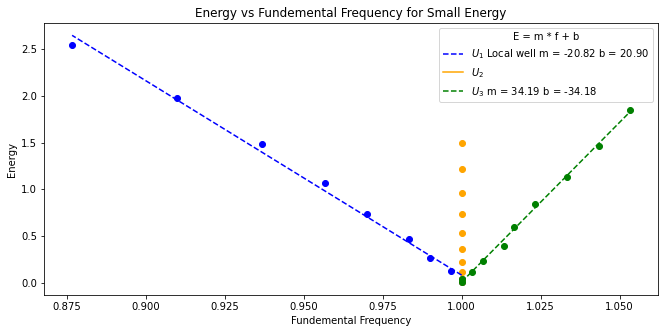

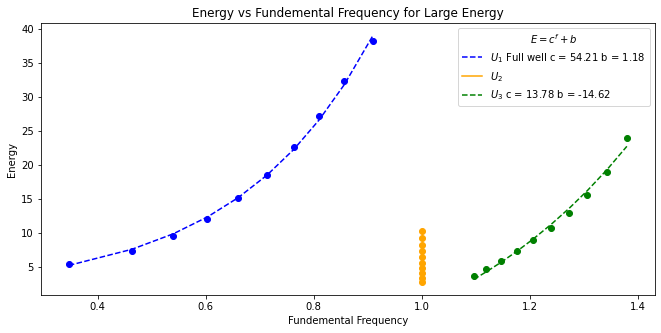

In [14]:
##############################################################################################

#Test for shift portitonality to energy
def frqEShift(RKN,Xpos,totalshift,totalsteps,xmin,xmax):
    shiftArray = np.linspace(Xpos,Xpos+totalshift,totalsteps)
    fArray = np.zeros(totalsteps)
    eArray = np.zeros(totalsteps)
    index = 0
    
    
    ##plt.figure(figsize=(18,6))    
    ##plt.ylim(0,6000)
    ##plt.xlim(0.5,5)
    
        
    for xValue in shiftArray:
        #Get values for RK method
        xA,vA,eA = RKN(xValue,0)
        
        #Get frequency.
        freq, mags = FTmethod(xA)
        fmax,magmax,indmax = localMax(freq,mags,xmin,xmax)
        
        #Get Energy for this Period
        energy = getExp(eA) 
        
        #Store values for this step and inc index
        fArray[index] = fmax
        eArray[index] = energy 
        
        index = index + 1

        #plt.plot(freq,mags,label = xValue)
        
        
        
    ##plt.legend(loc = 'upper right')    
    ##plt.show()
    return fArray,eArray

##########################################################################################

#NOTE: DUE TO SMALL DIFFRENCES, FOR LARGE AMOUNT OF DATA TIME ARRAY MUST BE REDEFINED. 

#SET TIME ARRAYS
time, dt = timeLong()

f1Loc,e1Loc = frqEShift(RK1,1.01,.3,10,.25,5) #Stays within local minimum at 1
f2,e2 = frqEShift(RK2,1.01,.3,10,.25,5)
f3,e3 = frqEShift(RK3,1.01,.3,10,.25,5)

plt.figure(figsize=(11,5))
plt.plot(f1Loc,e1Loc,'o',color = 'blue')
plt.plot(f2,e2,'o',color = 'orange')
plt.plot(f3,e3,'o',color = 'green')
plt.title('Energy vs Fundemental Frequency for Small Energy')
plt.xlabel('Fundemental Frequency')
plt.ylabel('Energy')

#Fit lines and plot them 
fit1, m1, b1 = myLinFit(f1Loc,e1Loc)
fit2, m2, b2 = myLinFit(f2,e2)
fit3, m3, b3 = myLinFit(f3,e3)

plt.plot(f1Loc,fit1,'--', color = 'blue' ,label = r'$U_1$ Local well m = {:.2f} b = {:.2f}'.format(m1,b1))
plt.plot(f2,fit2, color ='orange' ,label = '$U_2$')
plt.plot(f3,fit3,'--', color ='green' ,label = r'$U_3$ m = {:.2f} b = {:.2f}'.format(m3,b3))

plt.legend(loc = 'upper right', title = r'E = m * f + b')
plt.show()

##############################################################################################
#For larger energy values potential 1.

f1full, e1full = frqEShift(RK1,1.43,.5,10,.25,5) #Travels entire plot
f2,e2 = frqEShift(RK2,1.43,.5,10,.25,5)
f3,e3 = frqEShift(RK3,1.43,.5,10,.25,5)

plt.figure(figsize=(11,5))
plt.plot(f1full,e1full,'o',color = 'blue')
plt.plot(f2,e2,'o',color = 'orange')
plt.plot(f3,e3,'o',color = 'green')
plt.title('Energy vs Fundemental Frequency for Large Energy')
plt.xlabel('Fundemental Frequency')
plt.ylabel('Energy')


#Fit lines and plot them 
fit1, m1, b1 = myEpFit(f1full,e1full) #NOTE : PLUS 1 ADDED TO ALLSOW FOR CLEAR FIT! I ONLY CARE ABOUT THE CHANGE!
fit2, m2, b2 = myLinFit(f2,e2)
fit3, m3, b3 = myEpFit(f3,e3)

plt.plot(f1full,fit1,'--', color = 'blue' ,label = r'$U_1$ Full well c = {:.2f} b = {:.2f}'.format(m1,b1))
plt.plot(f2,fit2, color ='orange' ,label = '$U_2$')
plt.plot(f3,fit3,'--', color ='green' ,label = r'$U_3$ c = {:.2f} b = {:.2f}'.format(m3,b3))

plt.legend(loc = 'upper right',title = r'$E = c^f + b$')
plt.show()

# Prove 4
# Figure 9
Test if < x > -1 is proporitnal to E (4th bullet)

Must be at low energies

Un:  <x>         <x>-1       <e>
U1:  0.9979     -0.0021     0.0518
U2:  1.0018     0.0018     0.0470
U3:  1.0007     0.0007     0.0486


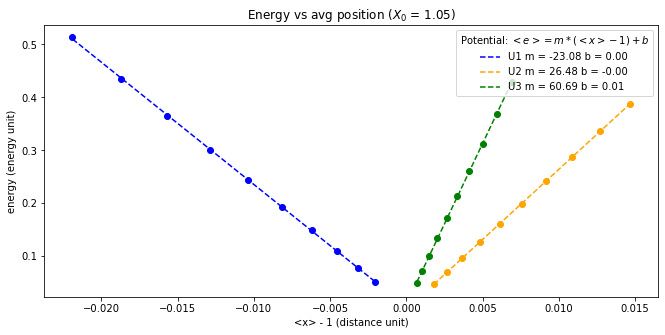

In [15]:
#SET TIME ARRAYS
time, dt = timeNorm()

#Gather Data
x1,v1,e1 = RK1(1.05,0) 
x2,v2,e2 = RK2(1.05,0)
x3,v3,e3 = RK3(1.05,0)

# #Plot energies
# plt.figure(figsize=(18,6))
# plt.plot(time,e1,label = 'U1')
# plt.plot(time,e2,label = 'U2')
# plt.plot(time,e3,label = 'U3')
# plt.title('Total Energy')
# plt.xlabel('time')
# plt.ylabel('Energy')
# plt.legend(loc = 'upper right')
# plt.show()

#Get avg values
xExp1 = getExp(x1)
eExp1 = getExp(e1)

xExp2 = getExp(x2)
eExp2 = getExp(e2)

xExp3 = getExp(x3)
eExp3 = getExp(e3)

print('Un:  <x>         <x>-1       <e>')
print('U1:  {:3.4f}     {:3.4f}     {:3.4f}'.format(xExp1,xExp1-1,eExp1))
print('U2:  {:3.4f}     {:3.4f}     {:3.4f}'.format(xExp2,xExp2-1,eExp2))
print('U3:  {:3.4f}     {:3.4f}     {:3.4f}'.format(xExp3,xExp3-1,eExp3))

#Try and show it is propertional for just U1
plt.figure(figsize=(11,5))
plt.title('Energy vs avg position ($X_0$ = 1.05)')
plt.xlabel('<x> - 1 (distance unit)')
plt.ylabel('energy (energy unit)')

#Potential 1
e1A = []
x1A = []
for i in np.linspace(1.05,1.15,10):
    x,v,e = RK1(i,0)
    xExpm = getExp(x) - 1
    eExp = getExp(e)
    plt.plot(xExpm,eExp,'o',color = 'blue')
    e1A.append(eExp)
    x1A.append(xExpm)

#Potential 2
e2A = []
x2A = []
for i in np.linspace(1.05,1.15,10):
    x,v,e = RK2(i,0)
    xExpm = getExp(x) - 1
    eExp = getExp(e)
    plt.plot(xExpm,eExp,'o',color = 'orange')
    e2A.append(eExp)
    x2A.append(xExpm)

#potenial 3
e3A = []
x3A = []
for i in np.linspace(1.05,1.15,10):
    x,v,e = RK3(i,0)
    xExpm = getExp(x) - 1
    eExp = getExp(e)
    plt.plot(xExpm,eExp,'o',color = 'green')
    e3A.append(eExp)
    x3A.append(xExpm)

#Create Fit Lines
fit1, m1, b1 = myLinFit(x1A,e1A)
fit2, m2, b2 = myLinFit(x2A,e2A)
fit3, m3, b3 = myLinFit(x3A,e3A)

plt.plot(x1A,fit1,'--', color = 'blue' ,label = r'U1 m = {:.2f} b = {:.2f}'.format(m1,b1))
plt.plot(x2A,fit2,'--', color ='orange' ,label = r'U2 m = {:.2f} b = {:.2f}'.format(m2,b2))
plt.plot(x3A,fit3,'--', color ='green' ,label = r'U3 m = {:.2f} b = {:.2f}'.format(m3,b3))



plt.legend(loc = 'upper right',title = r'Potential: $ <e> = m * (<x> - 1)  + b$')
plt.show()    

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Code below this line is for System with drag and driving force

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
Below this line the RK#d methods will be defined to take into account friciton and a driving force. 


In [16]:
#Here the RK# methods will be rewritten. 
def RK1d(xo,vo,gama,Fo,omega):
    #Get intital Arays
    xArray, vArray, eArray = MDA(xo,vo)
    
    #DO RK method
    for i in range(1,len(time)):
        tprime = time[i-1] + 0.5*dt
        
        #Get Prime values
        xp = xArray[i-1] + 0.5 * dt * vArray[i-1]
        #                                 #Negative Partial detivative of U(x)
        vp = vArray[i-1] + 0.5 * dt *( (-2*m.pi**2)*xArray[i-1]*((xArray[i-1]**2) - 1) - (vArray[i-1]*gama) + Fo*np.cos(omega*time[i-1]) )
        
        #Get step (i) values
        xArray[i] = xArray[i-1] + vp * dt
        vArray[i] = vArray[i-1] + dt *( (-2*m.pi**2)*xp*((xp**2) - 1) - (vp*gama) + Fo*np.cos(omega*tprime) )
    
    #Get Energy Array
    eArray = SumEnergy(U1,xArray,vArray)
    
    return xArray, vArray, eArray

##########################################################################################################
#Implement RK for U2
def RK2d(xo,vo,gama,Fo,omega): ####CONFUSED HERE
    #Get intital Arays
    xArray, vArray, eArray = MDA(xo,vo)
    
    #DO RK method
    for i in range(1,len(time)):
        tprime = time[i-1] + 0.5*dt
        
        #Get Prime values
        xp = xArray[i-1] + 0.5 * dt * vArray[i-1]
        #                                 #Negative Partial detivative of U(x)
        vp = vArray[i-1] + 0.5 * dt *( (-1*m.pi**2) * ((xArray[i-1]**4) -1)/(xArray[i-1]**3) - (vArray[i-1]*gama) + Fo*np.cos(omega*time[i-1]) )
        #Get step (i) values
        xArray[i] = xArray[i-1] + vp * dt
        vArray[i] = vArray[i-1] + dt *( (-1*m.pi**2) * ((xp**4 -1)/(xp**3)) - (vp*gama) + Fo*np.cos(omega*tprime) )
        
    #Get Energy Array
    eArray = SumEnergy(U2,xArray,vArray)
    
    return xArray, vArray, eArray

##########################################################################################################
#IMplement RK for U3
def RK3d(xo,vo,gama,Fo,omega):
    #Get intital Arays
    xArray, vArray, eArray = MDA(xo,vo)
    
    #DO RK method
    for i in range(1,len(time)):
        tprime = time[i-1] + 0.5*dt
        
        #Get Prime values
        xp = xArray[i-1] + 0.5 * dt * vArray[i-1]
        #                                 #Negative Partial detivative of U(x)
        vp = vArray[i-1] + 0.5 * dt *( (-2*m.pi**2) * (xArray[i-1]**6 -1) / (3*xArray[i-1]**3) - (vArray[i-1]*gama) + Fo*np.cos(omega*time[i-1]) )
        
        #Get step (i) values
        xArray[i] = xArray[i-1] + vp * dt
        vArray[i] = vArray[i-1] + dt *( (-2*m.pi**2) * (xp**6 -1) / (3*xp**3) - (vp*gama) + Fo*np.cos(omega*tprime) ) 
        
    #Get Energy Array
    eArray = SumEnergy(U3,xArray,vArray)
    
    return xArray, vArray, eArray

# Declare testing values

In [17]:
#Testing values
Xo = 1.42
Vo = 0
Gama = 0.5
drivingFo = 3
drivingFrq = 1/2*m.pi

# Test damped and driven RK1 method

In [18]:
# #SET TIME ARRAYS
# time, dt = timeMed()

# #Test 1st set
# x1n,v1n,e1n = RK1d(Xo,Vo,0,0,0) #Normal
# x1dp,v1dp,e1dp = RK1d(Xo,Vo,Gama,0,0) #damped
# x1dr,v1dr,e1dr = RK1d(Xo,Vo,0,drivingFo,drivingFrq) #driven
# x1a,v1a,e1a = RK1d(Xo,Vo,Gama,drivingFo,drivingFrq) #All the above

# plt.figure(figsize=(18,6))
# plt.plot(time,x1n, label = "normal")
# plt.plot(time,x1dp,label = "damped, $\gamma$ = {}".format(Gama))
# plt.plot(time,x1dr,label = "driven")
# plt.plot(time,x1a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U1 position')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,v1n, label = "normal")
# plt.plot(time,v1dp,label = "damped")
# plt.plot(time,v1dr,label = "driven")
# plt.plot(time,v1a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U1 velocity')
# plt.xlabel('time')
# plt.ylabel('velocity')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,e1n, label = "normal")
# plt.plot(time,e1dp,label = "damped")
# plt.plot(time,e1dr,label = "driven")
# plt.plot(time,e1a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U1 energy')
# plt.xlabel('time')
# plt.ylabel('Total energy')
# plt.show()



# Test damped and driven RK2 method

In [19]:

# #SET TIME ARRAYS
# time, dt = timeMed()

# #Test 2st set
# x2n,v2n,e2n = RK2d(Xo,Vo,0,0,0) #Normal
# x2dp,v2dp,e2dp = RK2d(Xo,Vo,Gama,0,0) #damped
# x2dr,v2dr,e2dr = RK2d(Xo,Vo,0,drivingFo,drivingFrq) #driven
# x2a,v2a,e2a = RK2d(Xo,Vo,Gama,drivingFo,drivingFrq) #All the above

# plt.figure(figsize=(18,6))
# plt.plot(time,x2n, label = "normal")
# plt.plot(time,x2dp,label = "damped")
# plt.plot(time,x2dr,label = "driven")
# plt.plot(time,x2a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U2 position')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,v2n, label = "normal")
# plt.plot(time,v2dp,label = "damped")
# plt.plot(time,v2dr,label = "driven")
# plt.plot(time,v2a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U2 velocity')
# plt.xlabel('time')
# plt.ylabel('velocity')
# plt.show()

# plt.figure(figsize=(18,6))
# plt.plot(time,e2n, label = "normal")
# plt.plot(time,e2dp,label = "damped")
# plt.plot(time,e2dr,label = "driven")
# plt.plot(time,e2a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U2 energy')
# plt.xlabel('time')
# plt.ylabel('Total energy')
# plt.show()


# Test damped and driven RK3 method

In [20]:

# #SET TIME ARRAYS
# time, dt = timeMed()

# #Test 3st set
# #x3n,v3n,e3n = RK3d(Xo,Vo,0,0,0) #Normal
# x3dp,v3dp,e3dp = RK3d(Xo,Vo,Gama,0,0) #damped
# #x3dr,v3dr,e3dr = RK3d(Xo,Vo,0,drivingFo,drivingFrq) #driven
# #x3a,v3a,e3a = RK3d(Xo,Vo,Gama,drivingFo,drivingFrq) #All the above

# plt.figure(figsize=(18,6))
# #plt.plot(time,x3n, label = "normal")
# plt.plot(time,x3dp,label = "damped")
# #plt.plot(time,x3dr,label = "driven")
# #plt.plot(time,x3a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U3 position')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.show()

# plt.figure(figsize=(18,6))
# #plt.plot(time,v3n, label = "normal")
# plt.plot(time,v3dp,label = "damped")
# #plt.plot(time,v3dr,label = "driven")
# #plt.plot(time,v3a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U3 velocity')
# plt.xlabel('time')
# plt.ylabel('velocity')
# plt.show()

# plt.figure(figsize=(18,6))
# #plt.plot(time,e3n, label = "normal")
# plt.plot(time,e3dp,label = "damped")
# #plt.plot(time,e3dr,label = "driven")
# #plt.plot(time,e3a,label = "daped and driven")
# plt.legend(loc = 'upper right')
# plt.title('U3 energy')
# plt.xlabel('time')
# plt.ylabel('Total energy')
# plt.show()




# Demo damped, and Damped driven
# Figure 10

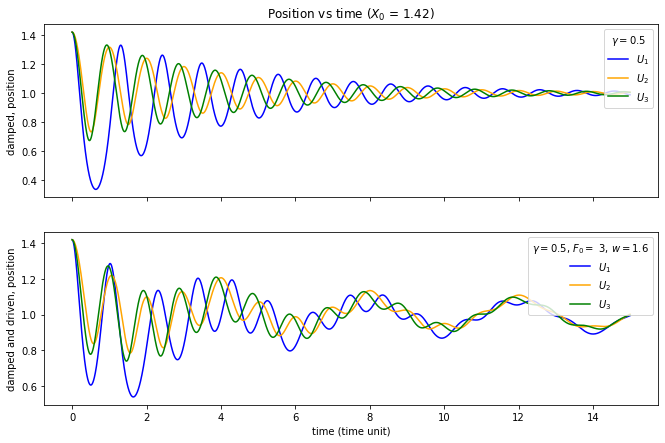

In [21]:
#Set constants.
Xo = 1.42
Vo = 0
Gama = 0.5
drivingFo = 3
drivingFrq = 1/2*m.pi

#Gather damped data
x1dp,v1dp,e1dp = RK1d(Xo,Vo,Gama,0,0)
x2dp,v2dp,e2dp = RK2d(Xo,Vo,Gama,0,0)
x3dp,v3dp,e3dp = RK3d(Xo,Vo,Gama,0,0)

#Gather damped and driven data
x1dr,v1dr,e1dr = RK1d(Xo,Vo,Gama,drivingFo,drivingFrq)
x2dr,v2dr,e2dr = RK2d(Xo,Vo,Gama,drivingFo,drivingFrq)
x3dr,v3dr,e3dr = RK3d(Xo,Vo,Gama,drivingFo,drivingFrq)

plt.figure(figsize=(11,7))
#Plot far values #On bottom
p3 = plt.subplot(2,1,2) #On bottom
plt.plot(time, x1dr, color = 'blue',label = r'$U_1$')
plt.plot(time, x2dr, color = 'orange',label = r'$U_2$')
plt.plot(time, x3dr, color = 'green',label = r'$U_3$')
plt.legend(loc = 'upper right', title = '$\gamma = ${}, $F_0 = $ {}, $w = ${:.2}'.format(Gama,drivingFo,drivingFrq))
plt.xlabel("time (time unit)")
plt.ylabel(r'damped and driven, position')
#plt.legend(loc = 'upper right')

#Plot close values # ON top
p1 = plt.subplot(2,1,1, sharex = p3) #On top
plt.plot(time, x1dp, color = 'blue',label = r'$U_1$')
plt.plot(time, x2dp, color = 'orange',label = r'$U_2$')
plt.plot(time, x3dp, color = 'green',label = r'$U_3$')
plt.title('Position vs time ($X_0$ = {})'.format(Xo))
plt.ylabel(r'damped, position')
plt.legend(loc = 'upper right', title = '$\gamma = ${}'.format(Gama))
plt.setp(p1.get_xticklabels(), visible=False)

plt.show()

# Prove 5
# Figure 11
No driving force. Show the decay is exponetial.

In [22]:
#imports related to this problem.
from scipy.signal import find_peaks

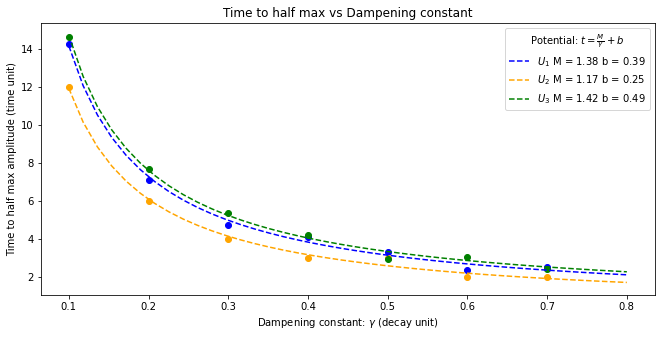

In [23]:
##########################################################################################################
#Use normal time
time, dt = timeMed()

def halfdecaytime(RKNd,XVAL,gArray): #NOTE: ASSUMES No driving force, and Vo = 0
                                     #NOTE: If A half value is not obtainable, this will place -1 in that place for the time.
    halftimes = np.zeros(len(gArray))
    #Get eachhalftime and and store in array
    index = 0
    for k in range(len(gArray)):
        gamahere = gArray[k]
        xA,vA,eA = RKNd(XVAL,0,gamahere,0,0)
        maxpeak = xA[0]-1
        
        peaks, _ = find_peaks(xA, height=0)
        for i in range(0,len(peaks)):
            if i == len(peaks) - 1:
                ht = -1
                break
            if xA[peaks[i]]-1 < maxpeak/2:
                ht = time[peaks[i]]
                break
        
        halftimes[index] = ht
        index = index + 1
        
    return halftimes

###########################################################################################################
#For each plot, three damaneing values will be used.
gamaVA = np.arange(0.1,0.8,0.1)
halftime1 = halfdecaytime(RK1d,3,gamaVA)
halftime2 = halfdecaytime(RK2d,3,gamaVA)
halftime3 = halfdecaytime(RK3d,3,gamaVA)

plt.figure(figsize=(11,5))

plt.plot(gamaVA,halftime1,'o',color = 'blue')
plt.plot(gamaVA,halftime2,'o',color = 'orange')
plt.plot(gamaVA,halftime3,'o',color = 'green')
plt.title('Time to half max vs Dampening constant')
plt.xlabel(r'Dampening constant: $\gamma$ (decay unit)')
plt.ylabel('Time to half max amplitude (time unit)')


#Find and show lines
fit1, m1, b1 = myInvFit(gamaVA,halftime1)
fit2, m2, b2 = myInvFit(gamaVA,halftime2)
fit3, m3, b3 = myInvFit(gamaVA,halftime3)


spangama = np.linspace(.1,.8,40)

plt.plot(spangama,invFit(spangama,m1,b1),'--', color = 'blue' ,label = r'$U_1$ M = {:.2f} b = {:.2f}'.format(m1,b1))
plt.plot(spangama,invFit(spangama,m2,b2),'--', color ='orange' ,label = r'$U_2$ M = {:.2f} b = {:.2f}'.format(m2,b2))
plt.plot(spangama,invFit(spangama,m3,b3),'--', color ='green' ,label = r'$U_3$ M = {:.2f} b = {:.2f}'.format(m3,b3))

plt.legend(loc = 'upper right', title = r'Potential: $ t = \frac{M}{\gamma} + b$')
plt.show()


# Demo damped (again)

In [24]:
# time, dt = timeMed()
# dper = m.pi
# dforce = np.linspace(1,3,3)
# dampening = .8

# #Make plot for U1
# plt.figure(figsize=(18,6))
# for df in dforce:
#     x1,v1,e1 = RK1d(1.5,0,dampening,df,dper)
#     plt.plot(time,x1,label = r'Driving Force: {:1.2f}'.format(df))
    
# plt.legend(loc = 'upper right')
# plt.title('U1 with driving')
# plt.xlabel('time')
# plt.ylabel('position')
# plt.show()

# #Make plot for U2
# plt.figure(figsize=(18,6))
# for df in dforce:
#     x1,v1,e1 = RK2d(1.5,0,dampening,df,dper)
#     plt.plot(time,x1,label = r'Driving Force: {:1.2f}'.format(df))
    
# plt.legend(loc = 'upper right')
# plt.title('U2 with driving')
# plt.xlabel('time')
# plt.ylabel('position')
# plt.show()

# #Make plot for U3
# plt.figure(figsize=(18,6))
# for df in dforce:
#     x1,v1,e1 = RK3d(1.5,0,dampening,df,dper)
#     plt.plot(time,x1,label = r'Driving Force: {:1.2f}'.format(df))
    
# plt.legend(loc = 'upper right')
# plt.title('U3 with driving')
# plt.xlabel('time')
# plt.ylabel('position')
# plt.show()


# Prove 6
# Figure 12, 13

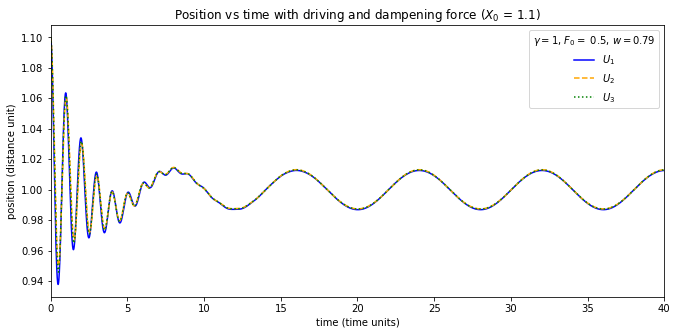

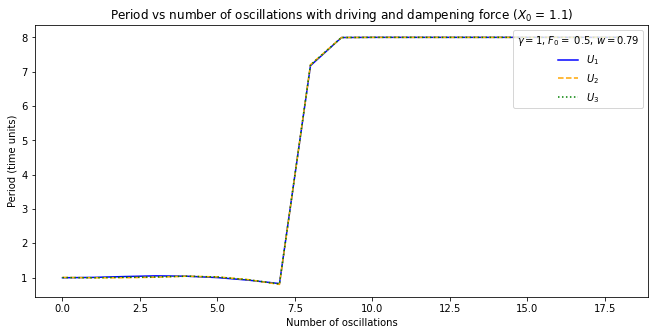

In [25]:
#Use single Xo value.on all three potentials.
time, dt = timeKindOfLong()
dper = m.pi/4
df = .5
dampening = 1

#Gather Data
x1,v1,e1 = RK1d(1.1,0,dampening,df,dper)
x2,v2,e2 = RK2d(1.1,0,dampening,df,dper)
x3,v3,e3 = RK3d(1.1,0,dampening,df,dper)

#Plot positions graphs
plt.figure(figsize=(11,5))
plt.plot(time,x1,label = r'$U_1$', color = 'blue')
plt.plot(time,x2,'--',label = r'$U_2$', color = 'orange')
plt.plot(time,x3,':',label = r'$U_3$', color = 'green')
plt.xlim(0,40)
plt.legend(loc = 'upper right',title = '$\gamma = ${}, $F_0 = $ {}, $w = ${:.2}'.format(dampening,df,dper))
plt.title('Position vs time with driving and dampening force ($X_0$ = 1.1)')
plt.xlabel('time (time units)')
plt.ylabel('position (distance unit)')
plt.show()

#Get Peak Positions.
TH = 0
peaks1, _ = find_peaks(x1, height=TH)
peaks2, _ = find_peaks(x2, height=TH)
peaks3, _ = find_peaks(x3, height=TH)

#Get Peaks
peaksT1 = time[peaks1]
peaksT2 = time[peaks2]
peaksT3 = time[peaks3]

#Get diffrence between peaks
f1 = np.diff(peaksT1)
f2 = np.diff(peaksT2)
f3 = np.diff(peaksT3)


plt.figure(figsize=(11,5))
plt.plot(np.arange(0,len(f1)),f1, label = r'$U_1$', color = 'blue',)
plt.plot(np.arange(0,len(f2)),f2,'--' ,label = r'$U_2$', color = 'orange',)
plt.plot(np.arange(0,len(f3)),f3,':' , label = r'$U_3$', color = 'green',)
plt.legend(loc = 'upper right', title = '$\gamma = ${}, $F_0 = $ {}, $w = ${:.2}'.format(dampening,df,dper))
plt.title('Period vs number of oscillations with driving and dampening force ($X_0$ = 1.1)')
plt.xlabel('Number of oscillations')
plt.ylabel('Period (time units)')
plt.show()



# Prove 6 more
# Figure 14

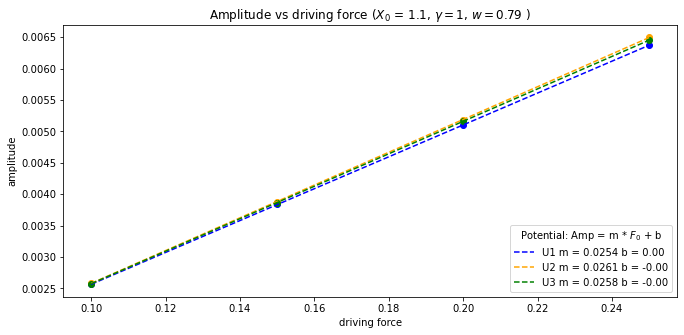

In [26]:
################################################################
#Plot multiple amplitudes vs time
#Make Fo array

time, dt = timeMed()

foArray = np.arange(.1,.3,.05)

amp1A = np.zeros(len(foArray))
amp2A = np.zeros(len(foArray))
amp3A = np.zeros(len(foArray))


for i in range(len(foArray)):  #NOTE: I DO NOT THIS IS AN EFECT LOOP. THIS IS A MEANS TO AN END. 
    
    #Gather data
    x1,v1,e1 = RK1d(1.2,0,dampening,foArray[i],dper)
    x2,v2,e2 = RK2d(1.2,0,dampening,foArray[i],dper)
    x3,v3,e3 = RK3d(1.2,0,dampening,foArray[i],dper)
    
    #Get peaks
    peaks1, _ = find_peaks(x1, height=TH) 
    peaks2, _ = find_peaks(x2, height=TH)
    peaks3, _ = find_peaks(x3, height=TH)
    
    #Get amp of peaks
    amp1A[i] = x1[peaks1[len(peaks1)-1]] - 1
    amp2A[i] = x2[peaks2[len(peaks2)-1]] - 1
    amp3A[i] = x3[peaks3[len(peaks3)-1]] - 1

#PLot Points
plt.figure(figsize=(11,5))
plt.plot(foArray,amp1A,'o', color = 'blue')
plt.plot(foArray,amp2A,'o', color = 'orange')
plt.plot(foArray,amp3A,'o', color = 'green')

#get and plot fit lines.
fit1, m1, b1 = myLinFit(foArray,amp1A)
fit2, m2, b2 = myLinFit(foArray,amp2A)
fit3, m3, b3 = myLinFit(foArray,amp3A)

plt.plot(foArray,fit1,'--', color = 'blue' ,label = r'U1 m = {:.4f} b = {:.2f}'.format(m1,b1))
plt.plot(foArray,fit2,'--', color ='orange' ,label = r'U2 m = {:.4f} b = {:.2f}'.format(m2,b2))
plt.plot(foArray,fit3,'--', color ='green' ,label = r'U3 m = {:.4f} b = {:.2f}'.format(m3,b3))


plt.title('Amplitude vs driving force ($X_0$ = 1.1, $\gamma = ${}, $w = ${:.2} )'.format(dampening,dper))
plt.xlabel('driving force')
plt.ylabel('amplitude')
plt.legend(loc = 'lower right',title = r'Potential: Amp = m * $F_0$ + b'  )
plt.show()
